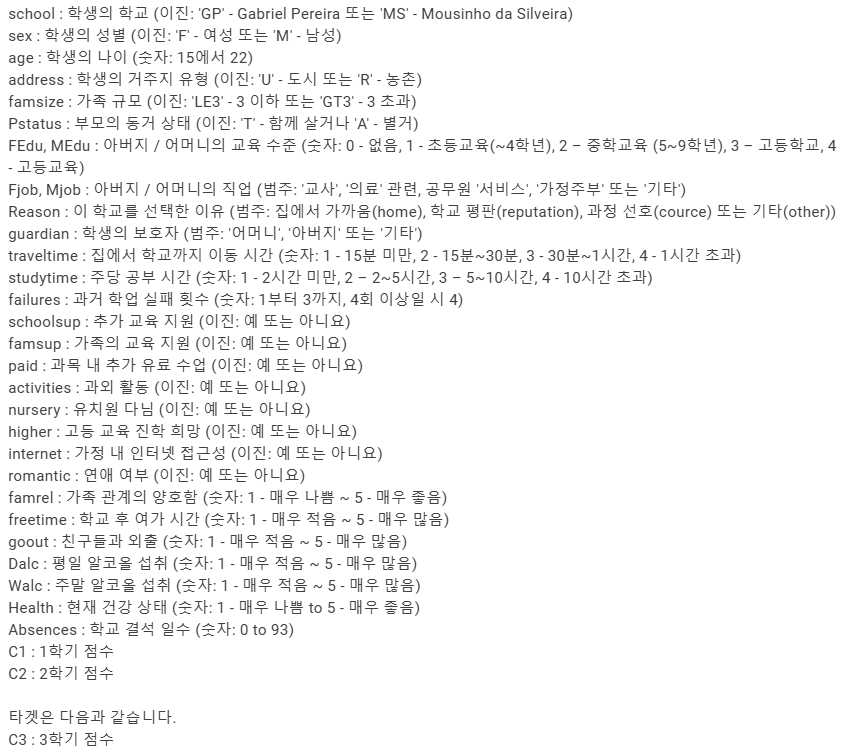

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/user/Desktop/ML/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      317 non-null    object
 1   sex         317 non-null    object
 2   age         317 non-null    int64 
 3   address     317 non-null    object
 4   famsize     317 non-null    object
 5   Pstatus     317 non-null    object
 6   Medu        317 non-null    int64 
 7   Fedu        317 non-null    int64 
 8   Mjob        317 non-null    object
 9   Fjob        317 non-null    object
 10  reason      317 non-null    object
 11  guardian    317 non-null    object
 12  traveltime  317 non-null    int64 
 13  studytime   317 non-null    int64 
 14  failures    317 non-null    int64 
 15  schoolsup   317 non-null    object
 16  famsup      317 non-null    object
 17  paid        317 non-null    object
 18  activities  317 non-null    object
 19  nursery     317 non-null    object
 20  higher    

In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
df = pd.get_dummies(df, columns=['school','sex','address','famsize','Pstatus','Fjob','Mjob','reason','guardian'],dtype=int)

In [6]:
df = df.replace({'schoolsup':{'yes':1, 'no':0},'famsup':{'yes':1, 'no':0},'paid':{'yes':1, 'no':0},'activities':{'yes':1, 'no':0},
                 'nursery':{'yes':1, 'no':0},'higher':{'yes':1, 'no':0},'internet':{'yes':1, 'no':0}, 'romantic':{'yes':1, 'no':0}})

C:\Users\user\AppData\Local\Temp\ipykernel_7352\1818567362.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'schoolsup':{'yes':1, 'no':0},'famsup':{'yes':1, 'no':0},'paid':{'yes':1, 'no':0},'activities':{'yes':1, 'no':0},


In [7]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,16,4,2,1,2,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1,15,4,4,2,2,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
2,18,3,3,1,2,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
3,16,2,3,1,2,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,15,4,3,1,2,0,0,1,1,1,...,0,0,1,0,1,0,0,0,1,0


In [8]:
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'school_GP', 'school_MS',
       'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other'],
      dtype='object')

In [9]:
data = df.drop(columns=['G3','G2','G1'])
target = df['G3']

In [10]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'DecisionTree Regression' : DecisionTreeRegressor()
}

results = {}
for model_name, model in models.items():
    model.fit(train_input, train_target)
    # 예측
    y_pred = model.predict(val_input)

    # 결정계수(R²) 계산
    r2 = r2_score(val_target, y_pred)
    results[model_name] = r2

results


{'Linear Regression': 0.025897123023181368,
 'Ridge Regression': 0.03578210496367784,
 'Lasso Regression': 0.0464605304141994,
 'Random Forest': 0.1339558364605964,
 'Gradient Boosting': 0.03041892832674198,
 'DecisionTree Regression': -0.8526565277503457}

In [13]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import randint, uniform

param_distributions = {
    'min_impurity_decrease': uniform(0.0001, 0.001),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 25),
    'min_samples_leaf': randint(1, 25)
}

# 랜덤 포레스트 회귀 모델 생성
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV를 사용하여 최적 하이퍼파라미터 탐색
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=300, cv=5, n_jobs=-1, random_state=42)
random_search.fit(train_input, train_target)

# 최적 모델 선택
best_regressor = random_search.best_estimator_

# 교차 검증 실시
scores = cross_validate(best_regressor, train_input, train_target, cv=5, return_train_score=True, n_jobs=-1)

# 교차 검증 결과 출력
print(scores)
print(f'Cross-validated score mean: {np.mean(scores['train_score']), np.mean(scores['test_score'])}')

# 검증 데이터에 대해 예측 및 평가

y_pred = best_regressor.predict(val_input)
r2 = r2_score(val_target, y_pred)
print(f'Validation R²: {r2}')

{'fit_time': array([0.07879686, 0.07983518, 0.07834935, 0.08038592, 0.07889581]), 'score_time': array([0.00349498, 0.00199723, 0.00199533, 0.00249648, 0.00299382]), 'test_score': array([0.2589898 , 0.41487197, 0.24331316, 0.17705199, 0.27573091]), 'train_score': array([0.60619669, 0.57622592, 0.63471523, 0.63621354, 0.63104415])}
Cross-validated score mean: (np.float64(0.6168791064855016), np.float64(0.27399156433583977))
Validation R²: 0.15293638214452154


In [14]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# 하이퍼파라미터 그리드 설정
param_grid = {
    'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.001],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30,40, 50],
    'min_samples_leaf': [1, 10, 20]
}

# 랜덤 포레스트 회귀 모델 생성
rf = RandomForestRegressor(random_state=42)

# GridSearchCV를 사용하여 최적 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1)
grid_search.fit(train_input, train_target)

# 최적 모델 선택
best_regressor = grid_search.best_estimator_

# 교차 검증 실시
# 교차 검증 실시
scores = cross_validate(best_regressor, train_input, train_target, cv=5, return_train_score=True, n_jobs=-1)

# 교차 검증 결과 출력
print(scores)
print(f'Cross-validated score mean: {np.mean(scores['train_score']), np.mean(scores['test_score'])}')

# 검증 데이터에 대해 예측 및 평가
y_pred = best_regressor.predict(val_input)
r2 = r2_score(val_target, y_pred)
print(f'Validation R²: {r2}')

{'fit_time': array([0.07521105, 0.07751465, 0.07651854, 0.07608938, 0.07671809]), 'score_time': array([0.00199008, 0.00299025, 0.00199318, 0.00198889, 0.00199342]), 'test_score': array([0.25969818, 0.40259401, 0.2340838 , 0.1776161 , 0.26830573]), 'train_score': array([0.56716119, 0.53530024, 0.594689  , 0.60095698, 0.59492443])}
Cross-validated score mean: (np.float64(0.5786063681729127), np.float64(0.268459564787605))
Validation R²: 0.1490805398382017
